<a target="_blank" href="https://colab.research.google.com/drive/1umIpFVnuYQxKad7cIh5knMXA7MZJBfSM?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students

/content/drive/MyDrive/Colab Notebooks/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students


In [5]:
# !git clone https://github.com/MarwaQabeel/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students.git

In [6]:
# # 1. Configure GitHub user details
# !git config --global user.name MarwaQabeel
# !git config --global user.email mqabeel3@gatech.edu

In [7]:
# !git config --global credential.helper store

In [8]:
# !git add .

In [9]:
# !git commit -m "add notebook"

In [10]:
# # Push the changes to the GitHub repository

# !git push https://github.com/MarwaQabeel/Optimizing-EDM-and-LA-to-Enhance-Equity-for-Underrepresented-Students.git master


In [11]:
pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 3.9 MB/s eta 0:00:00


## 1. Data Preparation and Loading


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("data/student_dropout.csv")

# Display the first few rows of the dataset
print(data.head())

# Get a concise summary of the dataframe
print(data.info())

# Generate descriptive statistics
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nationality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

In [13]:
# Display the first few rows to confirm it's loaded correctly
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [14]:
# Get the count of occurrences for each category in the "Target" column
target_category_counts = data['Target'].value_counts()
target_category_counts


,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [15]:
# Get the count of occurrences for each category in the specified columns
nationality_counts = data['Nationality'].value_counts()
gender_counts = data['Gender'].value_counts()
special_needs_counts = data['Educational special needs'].value_counts()
age_enrollment_counts = data['Age at enrollment'].value_counts()

# Display the counts
print("Nationality Counts:\n", nationality_counts)
print("\nGender Counts:\n", gender_counts)
print("\nEducational Special Needs Counts:\n", special_needs_counts)
print("\nAge at Enrollment Counts:\n", age_enrollment_counts)


Nationality Counts:
 Nationality
1     4314
14      38
12      14
9       13
3       13
10       5
16       3
4        3
18       3
8        2
17       2
15       2
11       2
2        2
19       2
13       1
5        1
21       1
20       1
6        1
7        1
Name: count, dtype: int64

Gender Counts:
 Gender
0    2868
1    1556
Name: count, dtype: int64

Educational Special Needs Counts:
 Educational special needs
0    4373
1      51
Name: count, dtype: int64

Age at Enrollment Counts:
 Age at enrollment
18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
42      13
49      13
46      12
48      11
51       7
54       7
53       7
17       5
55       5
52       4
59       3
58       3
57       2
60       2
61       1
70

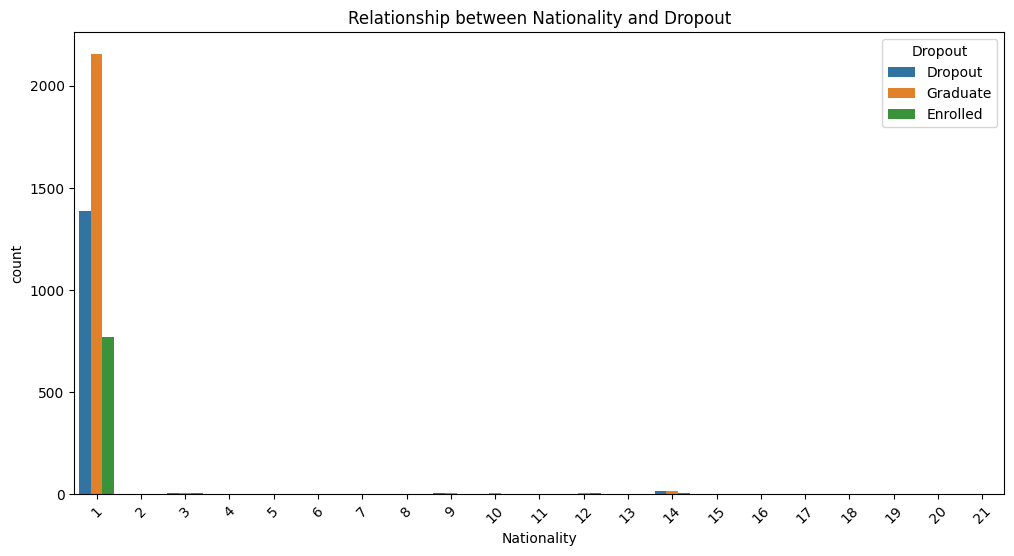

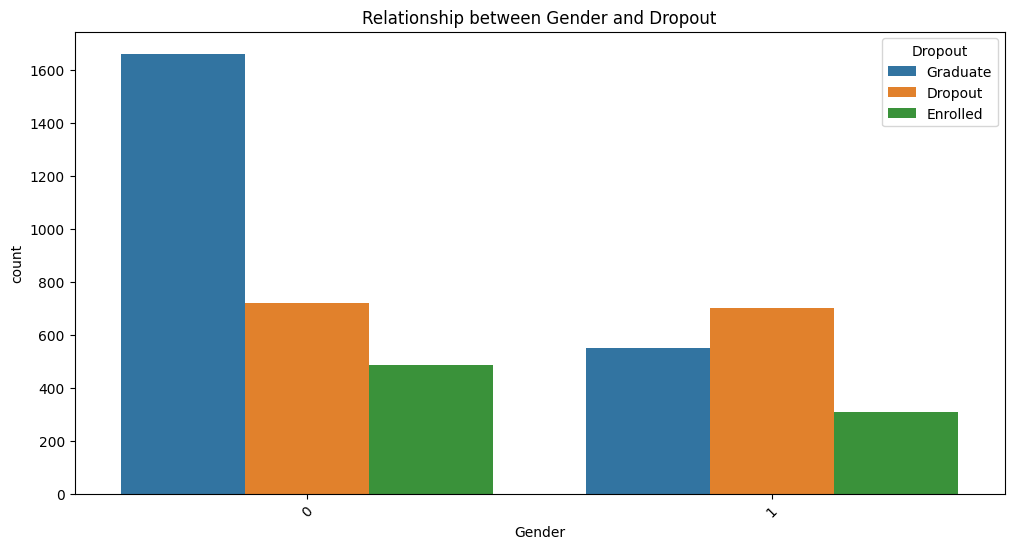

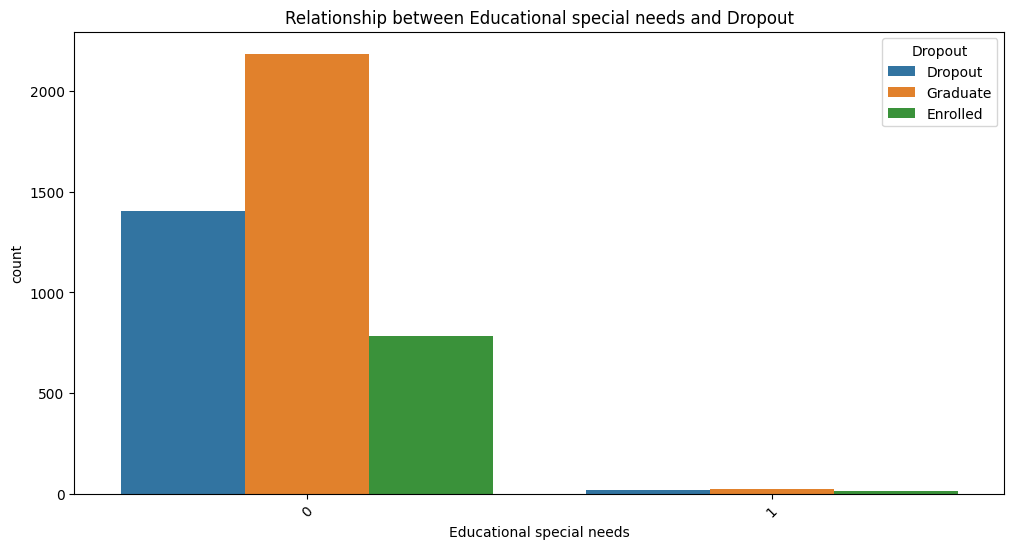

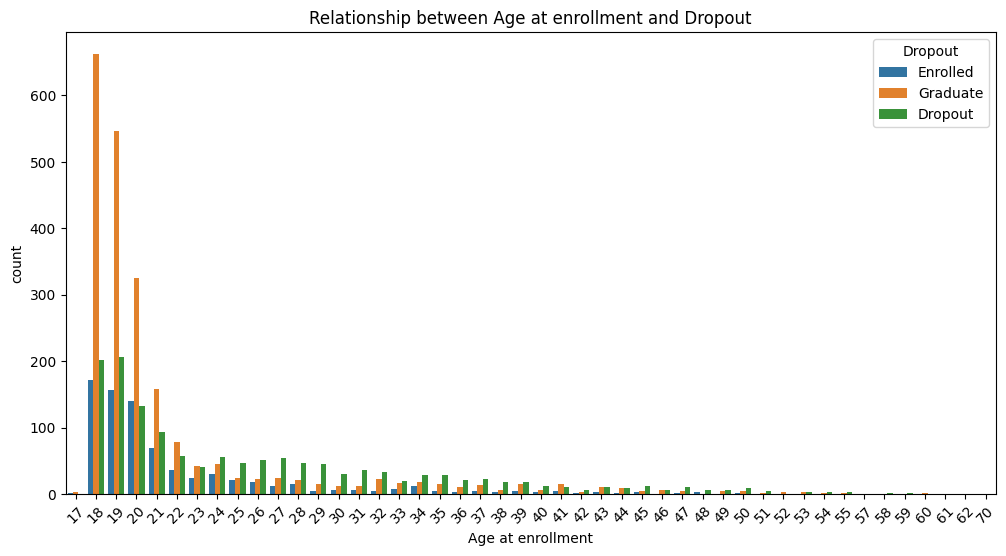

In [16]:
# data = pd.read_csv("data/student_dropout.csv")

# # Analyzing how sensitive attributes relate to the dropout rate
# sensitive_attrs = ['Nationality', 'Gender', 'Educational special needs', 'Age at enrollment']

# for attr in sensitive_attrs:
#     plt.figure(figsize=(12, 6))
#     sns.countplot(x=attr, hue='Target', data=data)  # Replace 'target_variable' with your actual target column name
#     plt.title(f'Relationship between {attr} and Dropout')
#     plt.xticks(rotation=45)
#     plt.legend(title='Dropout', loc='upper right')
#     plt.show()

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("data/student_dropout.csv")  # Assuming 'data/student_dropout.csv' was uploaded as '/mnt/data/student_dropout.csv'

# Define the path for saving plots
save_path = "photos"
os.makedirs(save_path, exist_ok=True)

# Define sensitive attributes and iterate through each to generate and save plots
sensitive_attrs = ['Nationality', 'Gender', 'Educational special needs', 'Age at enrollment']

for attr in sensitive_attrs:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=attr, hue='Target', data=data)
    plt.title(f'Relationship between {attr} and Dropout')
    plt.xticks(rotation=45)
    plt.legend(title='Dropout', loc='upper right')
    file_name = f"{attr}_Dropout_Relationship.png"
    plt.savefig(os.path.join(save_path, file_name))

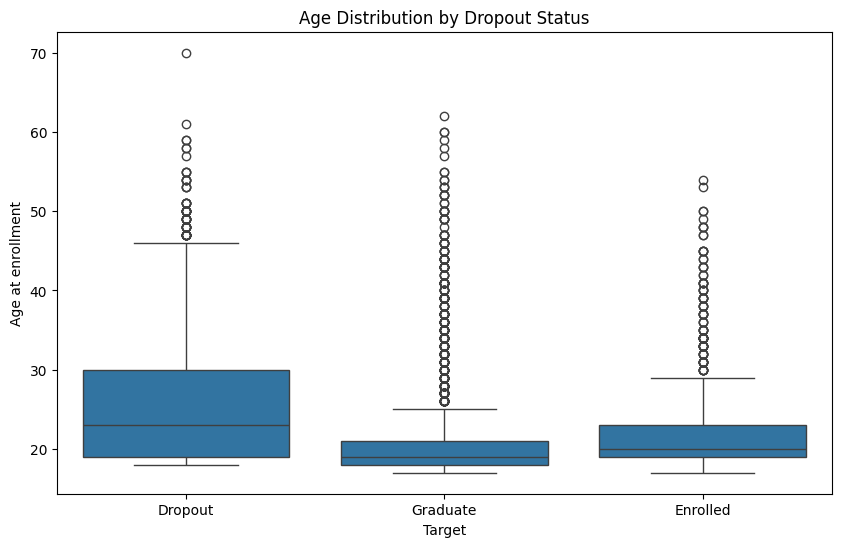

In [17]:
data = pd.read_csv("data/student_dropout.csv")


# Boxplots for age or any continuous variable against the target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age at enrollment', data=data)
plt.title('Age Distribution by Dropout Status')
plt.show()

## 2. Exploratory Data Analysis (EDA)

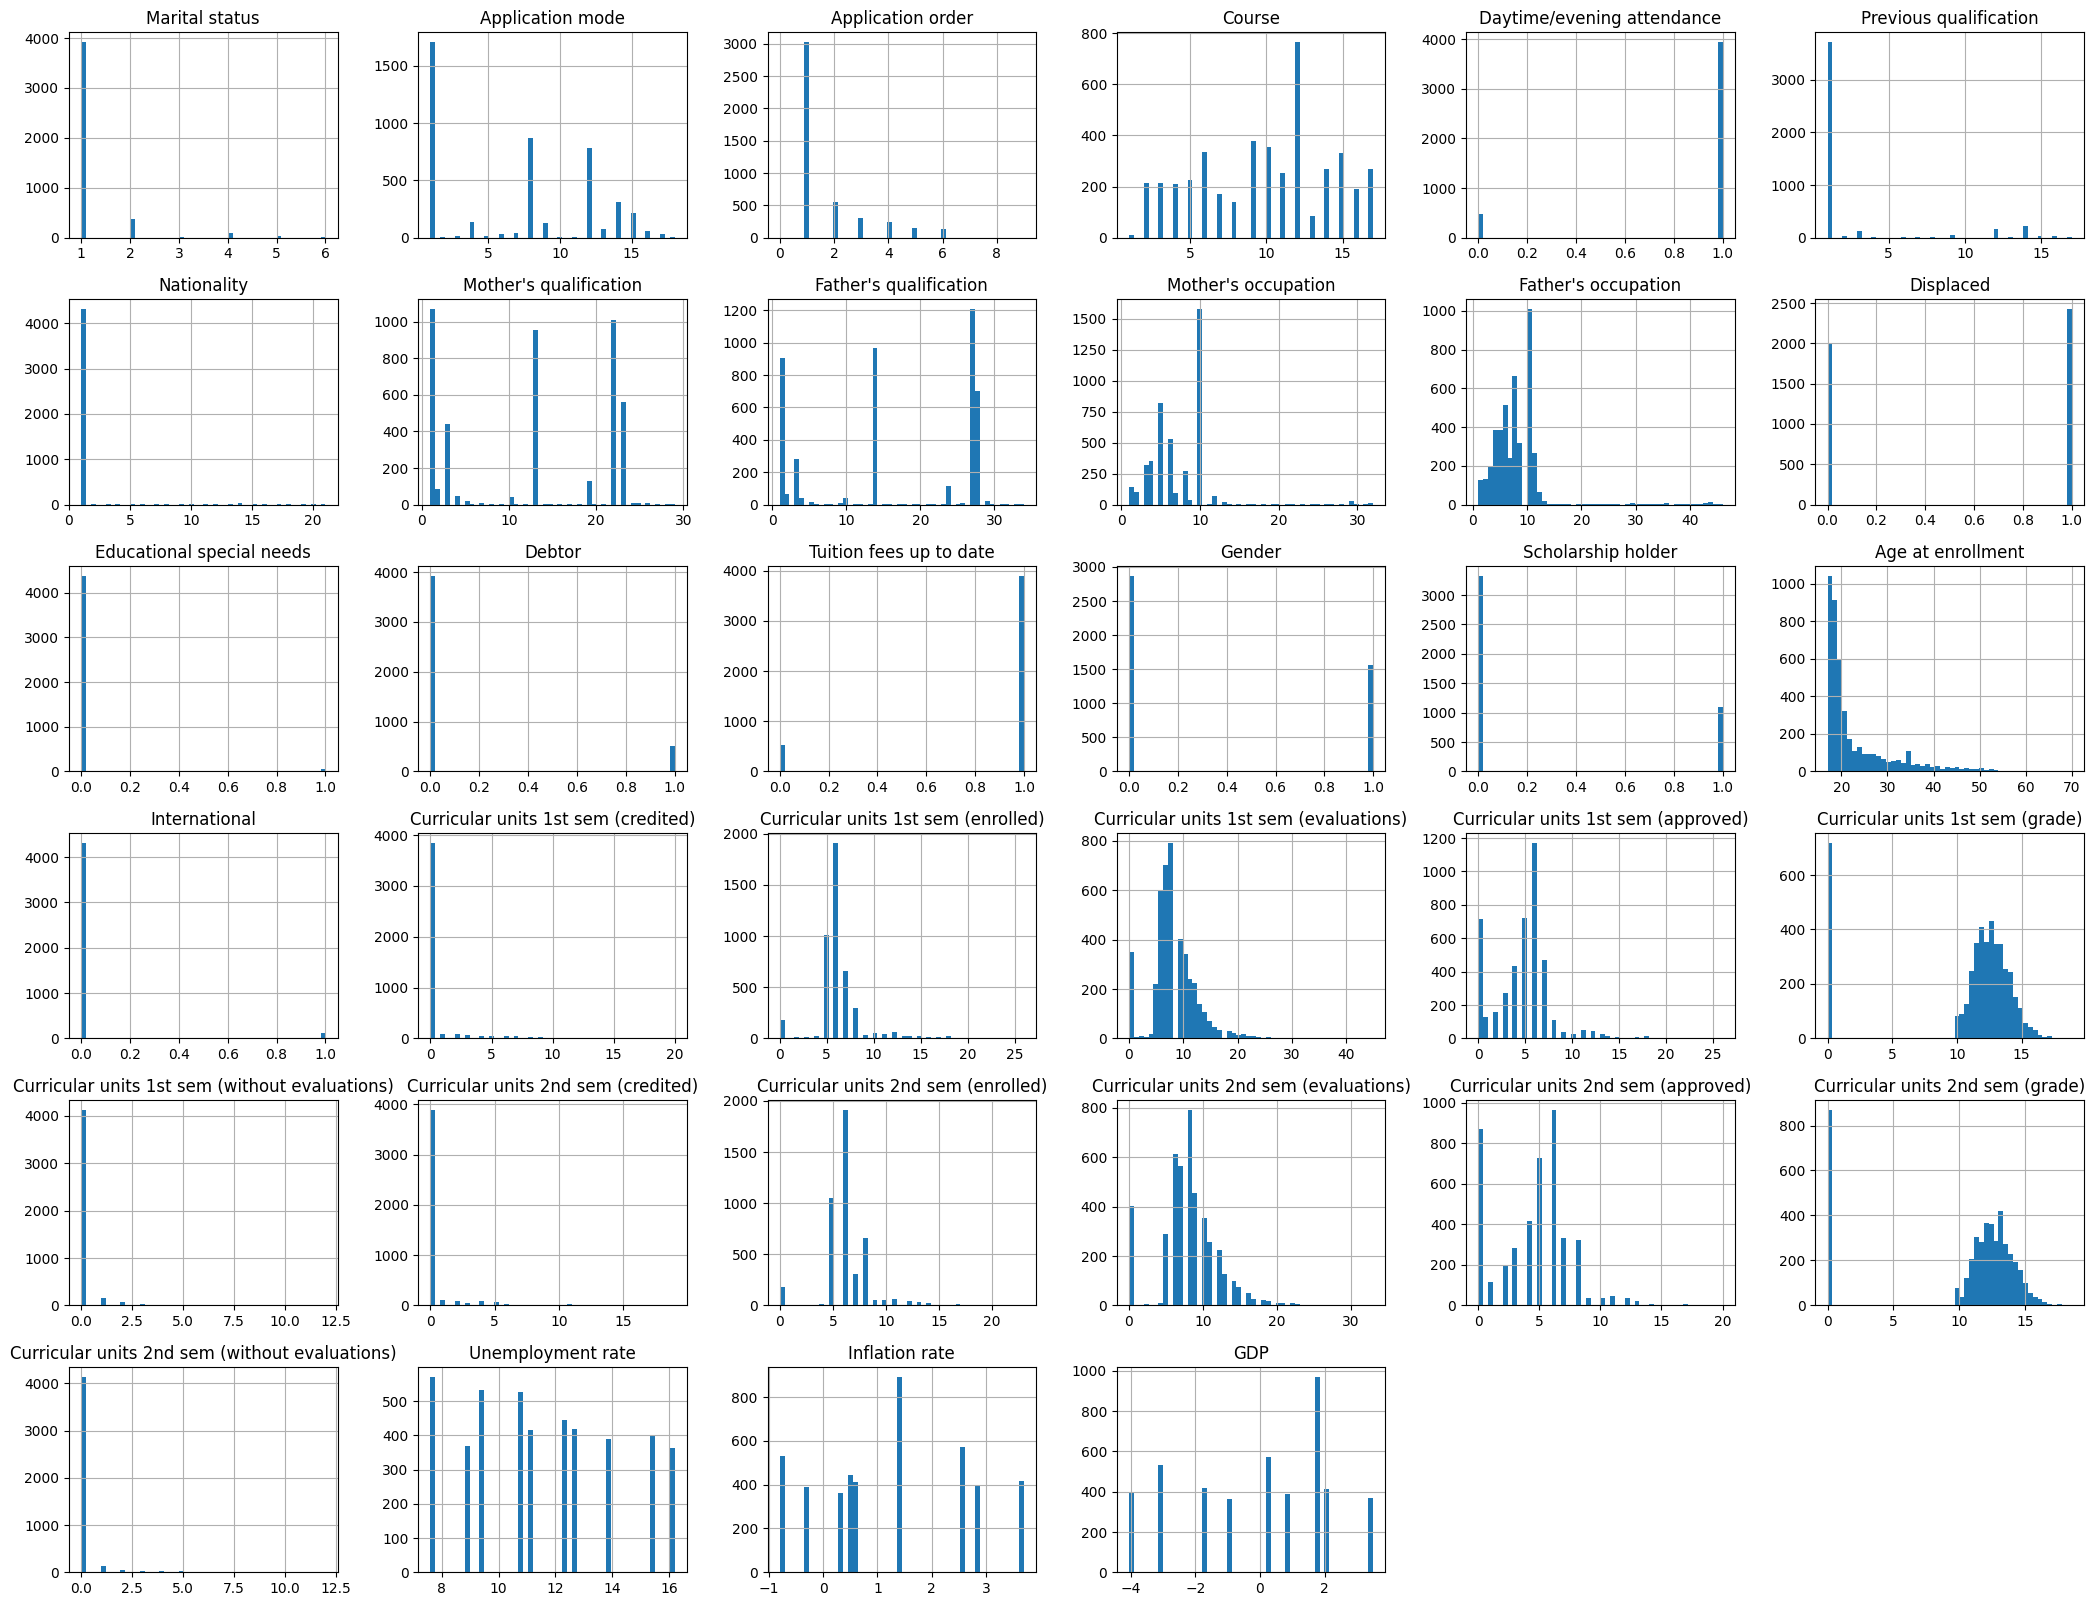

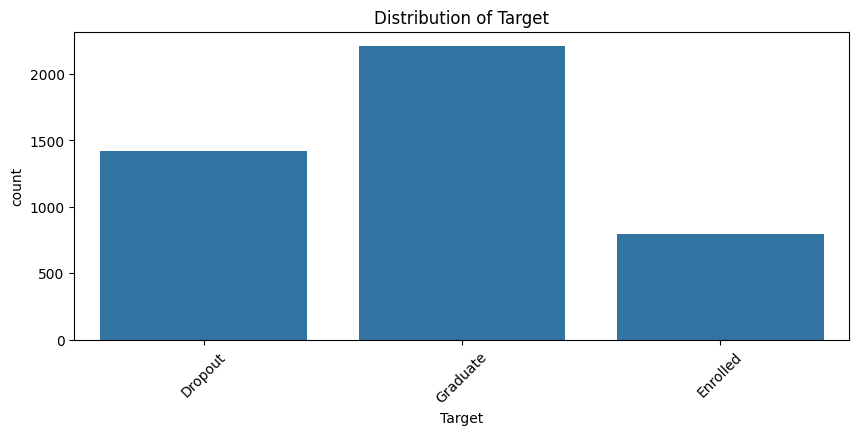

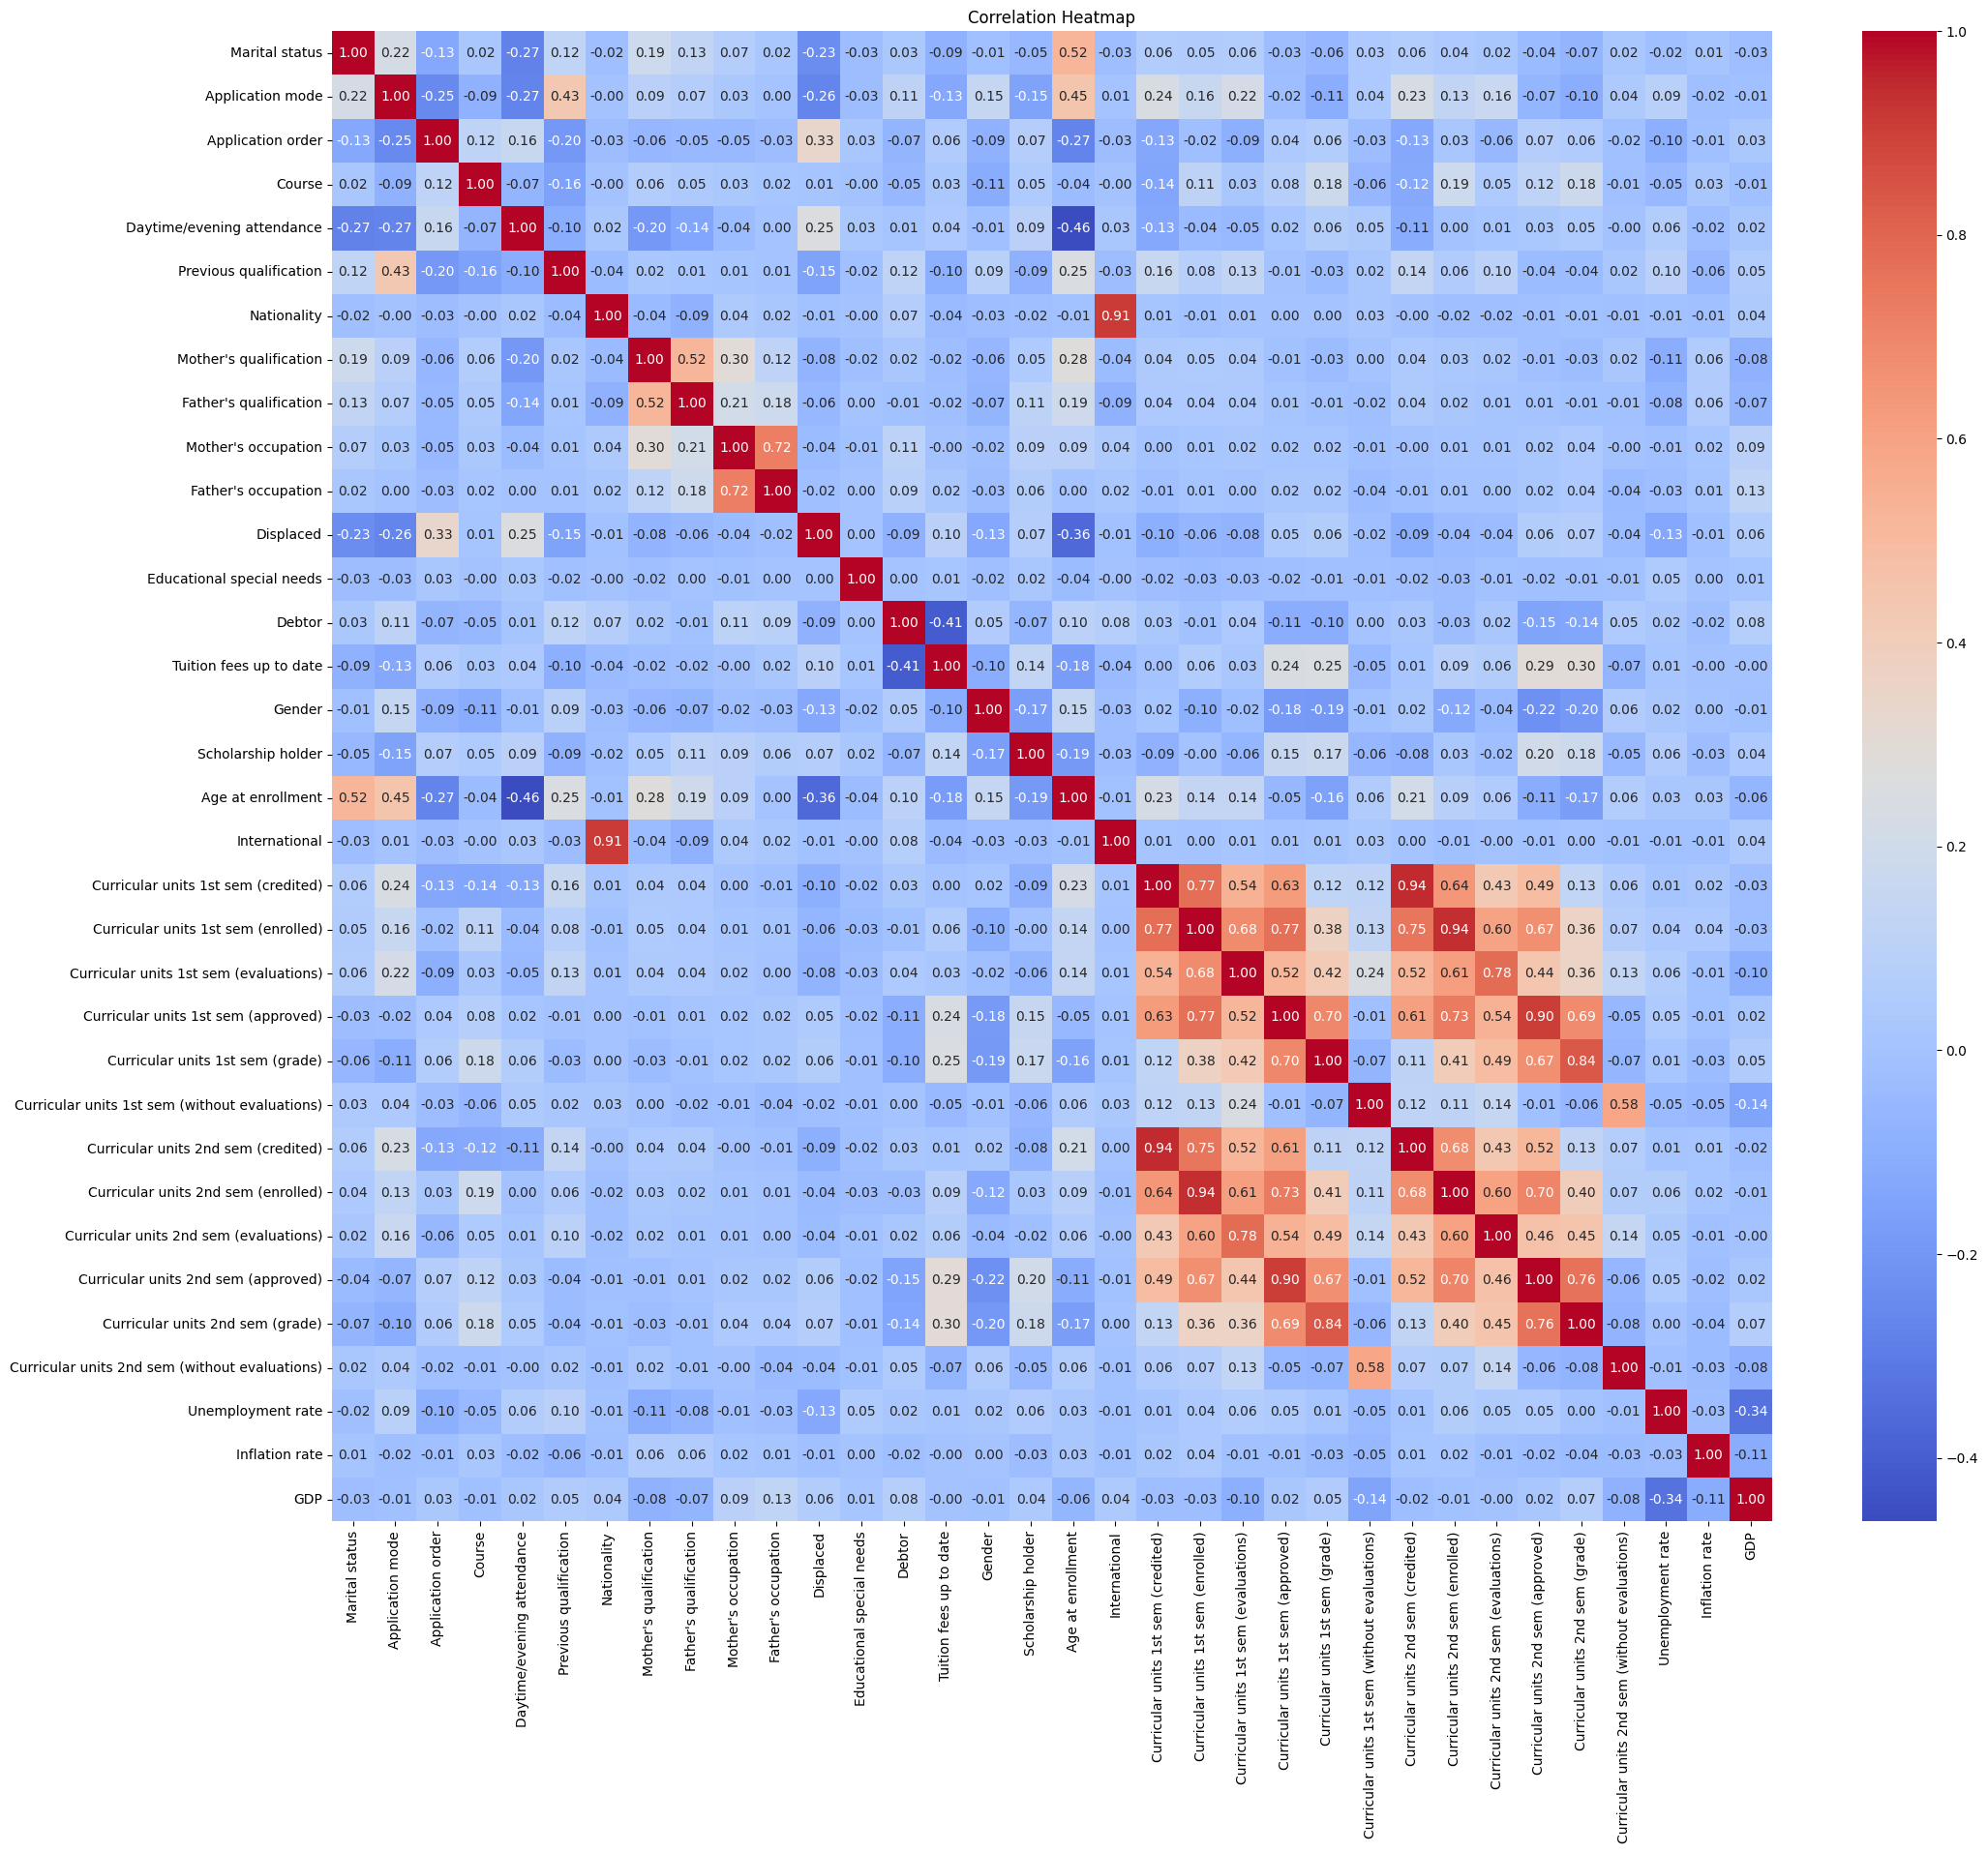

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
def load_data(filepath):
    return pd.read_csv(filepath)

# Visualize distributions of features
def visualize_distributions(data):
    numerical_attributes = data.select_dtypes(include=['float64', 'int64'])
    numerical_attributes.hist(bins=50, figsize=(26,20))
    plt.show()

    for column in data.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(10,4))
        sns.countplot(data=data, x=column)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.show()

# Correlation analysis
def correlation_analysis(data):
    # Select only numerical columns for correlation analysis
    numerical_data = data.select_dtypes(include=[np.number])
    correlation_matrix = numerical_data.corr()
    plt.figure(figsize=(24, 20))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Main execution block
if __name__ == "__main__":
    data = load_data("data/student_dropout.csv")  # Make sure to specify the correct path
    visualize_distributions(data)
    correlation_analysis(data)


In [19]:
import pandas as pd

# Loading the dataset to perform correlation analysis
data = pd.read_csv('data/student_dropout.csv')

# Performing correlation analysis on numerical data
numerical_data = data.select_dtypes(include=[float, int])
correlation_matrix = numerical_data.corr()

# Display the correlation matrix values
correlation_matrix


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.040255,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.060483,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.018276,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968
Nationality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,0.026203,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.003293,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,-0.017785,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.012569,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880


## 3. Model Training and Evaluation

In [20]:
import warnings
import pandas as pd
import numpy as np
from pandas.errors import PerformanceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.pipeline import Pipeline
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=PerformanceWarning)
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("data/student_dropout.csv")

# Process sensitive attributes
sensitive_attributes = data[['Nationality', 'Gender', 'Educational special needs', 'Age at enrollment']]
sensitive_processed = StandardScaler().fit_transform(sensitive_attributes)

# Binary classification focus
target_class = 'Dropout'
y_binary = (data['Target'] == target_class).astype(int)

# Categorical and numerical columns
categorical_cols = [col for col in data.columns if data[col].dtype == 'object' and col not in ['Target', 'Nationality', 'Gender', 'Educational special needs', 'Age at enrollment']]
numerical_cols = [col for col in data.columns if col not in categorical_cols + ['Target', 'Nationality', 'Gender', 'Educational special needs', 'Age at enrollment']]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True), numerical_cols)
    ]
)

# Logistic Regression Model with increased max_iter and different solver
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', max_iter=15000, penalty='l2', random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = train_test_split(
    data.drop(['Target'], axis=1),
    y_binary,
    sensitive_processed,
    test_size=0.2,
    random_state=42
)

# Ensure train and test data are dense
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Fit and predict using the logistic model pipeline
model_pipeline.fit(X_train_dense, y_train)
logistic_pred = model_pipeline.predict(X_test_dense)

# Evaluate the logistic model
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_metrics = precision_recall_fscore_support(y_test, logistic_pred, average='binary')
conf_matrix_logistic = confusion_matrix(y_test, logistic_pred)

# Fairness-aware model with Demographic Parity constraint
fair_model = ExponentiatedGradient(
    estimator=LogisticRegression(solver='saga', max_iter=15000, penalty='l2', random_state=42),
    constraints=DemographicParity()
)
fair_model.fit(X_train_dense, y_train, sensitive_features=sensitive_train)
fair_pred = fair_model.predict(X_test_dense)

# Evaluate the fairness-aware model
fair_accuracy = accuracy_score(y_test, fair_pred)
fair_metrics = precision_recall_fscore_support(y_test, fair_pred, average='binary')
conf_matrix_fair = confusion_matrix(y_test, fair_pred)

# Output evaluation results
results = {
    "Logistic Regression": {
        "Confusion Matrix": conf_matrix_logistic,
        "Accuracy": logistic_accuracy,
        "Metrics": logistic_metrics
    },
    "Fairness-aware Model": {
        "Confusion Matrix": conf_matrix_fair,
        "Accuracy": fair_accuracy,
        "Metrics": fair_metrics
    }
}

print(results)

# Define and calculate fairness metrics
def fairness_metrics(y_true, y_pred, sensitive_features):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_recall_fscore_support(y_true, y_pred, average='binary')[0],
        'recall': precision_recall_fscore_support(y_true, y_pred, average='binary')[1],
        'f1_score': precision_recall_fscore_support(y_true, y_pred, average='binary')[2],
        'demographic_parity_difference': demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_features),
        'equalized_odds_difference': equalized_odds_difference(y_true, y_pred, sensitive_features=sensitive_features)
    }
    return metrics

# Calculate fairness metrics for logistic and fairness-aware models
metrics_logistic = fairness_metrics(y_test, logistic_pred, sensitive_test)
metrics_fair = fairness_metrics(y_test, fair_pred, sensitive_test)

# Output the metrics
print("Logistic Regression Fairness Metrics:")
for metric, value in metrics_logistic.items():
    print(f"{metric}: {value:.2f}")

print("\nFairness-aware Model Fairness Metrics:")
for metric, value in metrics_fair.items():
    print(f"{metric}: {value:.2f}")


{'Logistic Regression': {'Confusion Matrix': array([[531,  38],
       [ 90, 226]]), 'Accuracy': 0.8553672316384181, 'Metrics': (0.8560606060606061, 0.7151898734177216, 0.7793103448275862, None)}, 'Fairness-aware Model': {'Confusion Matrix': array([[569,   0],
       [309,   7]]), 'Accuracy': 0.6508474576271186, 'Metrics': (1.0, 0.022151898734177215, 0.043343653250773995, None)}}
Logistic Regression Fairness Metrics:
accuracy: 0.86
precision: 0.86
recall: 0.72
f1_score: 0.78
demographic_parity_difference: 1.00
equalized_odds_difference: 1.00

Fairness-aware Model Fairness Metrics:
accuracy: 0.65
precision: 1.00
recall: 0.02
f1_score: 0.04
demographic_parity_difference: 0.33
equalized_odds_difference: 0.50


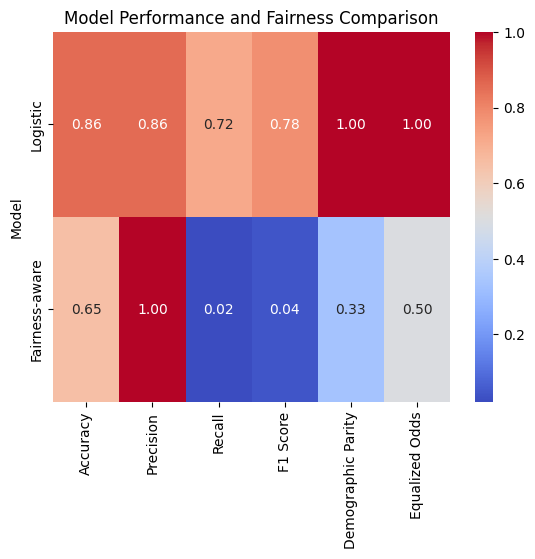

In [21]:
# Function to plot metric comparisons
def plot_metrics_comparison(metrics_logistic, metrics_fair):
    metrics_df = pd.DataFrame({
        'Model': ['Logistic', 'Fairness-aware'],
        'Accuracy': [metrics_logistic['accuracy'], metrics_fair['accuracy']],
        'Precision': [metrics_logistic['precision'], metrics_fair['precision']],
        'Recall': [metrics_logistic['recall'], metrics_fair['recall']],
        'F1 Score': [metrics_logistic['f1_score'], metrics_fair['f1_score']],
        'Demographic Parity': [metrics_logistic['demographic_parity_difference'], metrics_fair['demographic_parity_difference']],
        'Equalized Odds': [metrics_logistic['equalized_odds_difference'], metrics_fair['equalized_odds_difference']]
    })
    metrics_df.set_index('Model', inplace=True)
    sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title('Model Performance and Fairness Comparison')
    plt.show()

# Plotting the results
plot_metrics_comparison(metrics_logistic, metrics_fair)

In [22]:
from sklearn.model_selection import GridSearchCV
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

# Reduce the complexity of GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Reduced number of parameters
    'classifier__penalty': ['l2']  # Only using L2 penalty
}

grid_search = GridSearchCV(model_pipeline, param_grid, scoring='accuracy', cv=3, n_jobs=-1)  # Using fewer CV folds and all cores
grid_search.fit(X_train_dense, y_train)  # Make sure data is preprocessed and dense

# Evaluate the best model from grid search
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test_dense)
best_metrics = fairness_metrics(y_test, best_pred, sensitive_test)

print(f"Best model performance: {best_metrics}")

# Optionally, plot results or further explore fairness constraints


Best model performance: {'accuracy': 0.8553672316384181, 'precision': 0.8560606060606061, 'recall': 0.7151898734177216, 'f1_score': 0.7793103448275862, 'demographic_parity_difference': 1.0, 'equalized_odds_difference': 1.0}


In [23]:
from sklearn.linear_model import LogisticRegression
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

# Use a more reasonable number of iterations and simplify the model
base_estimator = LogisticRegression(solver='saga', max_iter=1000, penalty='l2')

constraints = [DemographicParity(), EqualizedOdds()]

results = {}
for constraint in constraints:
    fair_model = ExponentiatedGradient(
        estimator=base_estimator,
        constraints=constraint
    )
    fair_model.fit(X_train_dense, y_train, sensitive_features=sensitive_train)
    fair_pred = fair_model.predict(X_test_dense)
    metrics = fairness_metrics(y_test, fair_pred, sensitive_test)
    results[constraint.__class__.__name__] = metrics

for name, metrics in results.items():
    print(f"Results with {name}: {metrics}")


Results with DemographicParity: {'accuracy': 0.6451977401129944, 'precision': 0.6, 'recall': 0.0189873417721519, 'f1_score': 0.03680981595092025, 'demographic_parity_difference': 1.0, 'equalized_odds_difference': 1.0}
Results with EqualizedOdds: {'accuracy': 0.6451977401129944, 'precision': 0.6, 'recall': 0.0189873417721519, 'f1_score': 0.03680981595092025, 'demographic_parity_difference': 1.0, 'equalized_odds_difference': 1.0}
